# Developer Survey Data Analysis
author: Fabio Carvalho Lima

## Introduction

In this data analysis project, we aim to gain valuable insights from developer survey data. The analysis follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework, which provides a systematic approach to tackle data-driven questions. We will explore multiple years of survey data to answer critical business questions related to programming language preferences, remote work trends, and career paths in data science.

## CRISP-DM Steps - Udacity Write a Data Science Blog Post

### 1. Business Understanding

In this step, we define the business questions we want to answer using the developer survey data. The key areas of interest include:

- What are the most popular programming languages among developers in each year?
- What are the most popular languages among data scientists?
- What is the trend in remote work among developers over the years?

### 2. Data Understanding

We gather survey data from multiple years and explore its structure and contents. The datasets contain various columns, including language preferences, employment status, and education level.

### 3. Data Preparation

In this step, we prepare the data for analysis by performing the following tasks:

- Load the data from CSV files and select specific columns of interest.
- Create a mapping of column names to unify them across all years.
- Add a new column to each dataframe to represent the survey year.
- Split language columns containing multiple values into lists.
- Fill missing values for language columns with a string representation of an empty list.
- Convert the string representation of lists to actual lists.

### 4. Data Modeling

In this step, we address specific business questions using data manipulation and aggregation techniques. We conduct exploratory data analysis to gain insights into language preferences, remote work trends, and career paths in data science. We create visualizations, such as bar plots and line plots, to present the findings effectively.

### 5. Evaluation

In this step, we evaluate the popularity of programming languages among developers and data scientists in each year. We assess the trend in remote work adoption among developers over the years. We identify the most common roles that lead to a career in data science in each continent.

### 6. Deployment

In the final step, we document the analysis process and findings concisely for different audiences, including data scientists and general readers. We create documents suitable for sharing on Medium and GitHub to disseminate the insights.

## Conclusion

By following the CRISP-DM framework, we can progress systematically from understanding the business questions to delivering actionable insights. The analysis will provide valuable guidance to data scientists, developers, and technology enthusiasts, helping them make informed decisions and navigate their careers effectively. The final analysis.ipynb document will showcase the code, visualizations, and explanations of our findings.

## Code used to perform the CRISP-DM process
___

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from IPython import display
pd.set_option('display.max_columns', None)

import warnings

# Ignore the DtypeWarning
warnings.filterwarnings('ignore', category=pd.errors.DtypeWarning)

%matplotlib inline

## 2 - Data Understanding and 3 - Prepare the data.
___

We choose to perform these steps together, because we want to avoid work with all the columns and focus only in the columns are related to answer the business questions.

#### Dataset - Stack Overflow Developer Survey: 2017, 2018, 2019, 2020, 2021, 2022 and 2023.

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sort of information like programming languages, code style and various other information. In order to simplify the analysis, we use a few columns of each year to answer the business questions raised.


In [2]:
# Dataset from each year
data_2017 = "survey_results_public_2017.csv"
data_2018 = "survey_results_public_2018.csv"
data_2019 = "survey_results_public_2019.csv"
data_2020 = "survey_results_public_2020.csv"
data_2021 = "survey_results_public_2021.csv"
data_2022 = "survey_results_public_2022.csv"
data_2023 = "survey_results_public_2023.csv"

# The columns used for this project
cols_2017 = ['Respondent', 'HaveWorkedLanguage', 'WantWorkLanguage', 'EmploymentStatus', 'Salary', 'Country', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'YearsCodedJob', 'FormalEducation', 'CareerSatisfaction']
cols_2018 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedSalary', 'Country', 'DevType', 'YearsCoding', 'FormalEducation', 'CareerSatisfaction']
cols_2019 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedComp', 'Country', 'DevType', 'YearsCode', 'EdLevel', 'CareerSat', 'WorkRemote']
cols_2020 = ['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'Employment', 'ConvertedComp', 'Country', 'DevType', 'YearsCode', 'EdLevel', 'JobSat']
cols_2021 = ['ResponseId', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Employment', 'ConvertedCompYearly', 'Country', 'DevType', 'YearsCode', 'EdLevel']
cols_2022 = ['ResponseId', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Employment', 'ConvertedCompYearly', 'Country', 'DevType', 'YearsCode', 'EdLevel', 'RemoteWork']
cols_2023 = ['ResponseId', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'Employment', 'ConvertedCompYearly', 'Country', 'DevType', 'YearsCode', 'EdLevel', 'RemoteWork']

In [3]:
# Load only the columns of interest from each dataset
df_2017 = pd.read_csv(data_2017, usecols=cols_2017)
df_2018 = pd.read_csv(data_2018, usecols=cols_2018)
df_2019 = pd.read_csv(data_2019, usecols=cols_2019)
df_2020 = pd.read_csv(data_2020, usecols=cols_2020)
df_2021 = pd.read_csv(data_2021, usecols=cols_2021)
df_2022 = pd.read_csv(data_2022, usecols=cols_2022)
df_2023 = pd.read_csv(data_2023, usecols=cols_2023)

In [4]:
# Add the year of the survey as a new column in each dataframe
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020
df_2021['Year'] = 2021
df_2022['Year'] = 2022
df_2023['Year'] = 2023

# Check the result
df_2023.head()

,ResponseId,Employment,RemoteWork,EdLevel,YearsCode,DevType,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,ConvertedCompYearly,Year
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,2,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Senior Executive (C-Suite, VP, etc.)",United States of America,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,285000.0,2023
2,3,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Developer, back-end",United States of America,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,250000.0,2023
3,4,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Developer, front-end",United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,156000.0,2023
4,5,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Developer, full-stack",Philippines,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,23456.0,2023


In [5]:
# Define a mapping of current column names to unified names
column_mapping = {
    'HaveWorkedLanguage': 'LanguageWorkedWith',  # 2017
    'WantWorkLanguage': 'LanguageDesireNextYear',  # 2017
    'YearsCodedJob': 'YearsCoding',  # 2017 to 2018
    'EmploymentStatus': 'Employment',  # 2017
    'Salary': 'ConvertedComp',  # 2017
    'DeveloperType': 'DevType',  # 2017
    'FormalEducation': 'EdLevel',  # 2017 to 2018
    'CareerSatisfaction': 'JobSat',  # 2017 to 2018
    'ResponseId': 'Respondent',  # 2021 to 2023
    'LanguageHaveWorkedWith': 'LanguageWorkedWith',  # 2021 to 2023
    'LanguageWantToWorkWith': 'LanguageDesireNextYear',  # 2021 to 2023
    'ConvertedCompYearly': 'ConvertedComp',  # 2021 to 2023
    'WorkRemote': 'RemoteWork'  # 2019 to 2023
}

# Rename the columns in each dataframe according to the mapping
df_2017.rename(columns=column_mapping, inplace=True)
df_2018.rename(columns=column_mapping, inplace=True)
df_2019.rename(columns=column_mapping, inplace=True)
df_2020.rename(columns=column_mapping, inplace=True)
df_2021.rename(columns=column_mapping, inplace=True)
df_2022.rename(columns=column_mapping, inplace=True)
df_2023.rename(columns=column_mapping, inplace=True)

In [6]:
# List all the dataframes and their corresponding year
dfs = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

Modify the column label names to be consistent in all dataframes.

In [7]:
# Define a mapping of current column names to unified names
column_mapping = {
    'HaveWorkedLanguage': 'LanguageWorkedWith',  # 2017
    'WantWorkLanguage': 'LanguageDesireNextYear',  # 2017
    'YearsCodedJob': 'YearsCoding',  # 2017 to 2018
    'EmploymentStatus': 'Employment',  # 2017
    'Salary': 'ConvertedComp',  # 2017
    'DeveloperType': 'DevType',  # 2017
    'FormalEducation': 'EdLevel',  # 2017 to 2018
    'CareerSatisfaction': 'JobSat',  # 2017 to 2018
    'ResponseId': 'Respondent',  # 2021 to 2023
    'LanguageHaveWorkedWith': 'LanguageWorkedWith',  # 2021 to 2023
    'LanguageWantToWorkWith': 'LanguageDesireNextYear',  # 2021 to 2023
    'ConvertedCompYearly': 'ConvertedComp',  # 2021 to 2023
    'WorkRemote': 'RemoteWork'  # 2019 to 2023
}

# Rename the columns in each dataframe according to the mapping
df_2017.rename(columns=column_mapping, inplace=True)
df_2018.rename(columns=column_mapping, inplace=True)
df_2019.rename(columns=column_mapping, inplace=True)
df_2020.rename(columns=column_mapping, inplace=True)
df_2021.rename(columns=column_mapping, inplace=True)
df_2022.rename(columns=column_mapping, inplace=True)
df_2023.rename(columns=column_mapping, inplace=True)

In [8]:
# Split language columns
for df in dfs:
    for col in ['LanguageWorkedWith', 'LanguageDesireNextYear']:
        # Check if the column exists before trying to split it
        if col in df.columns:
            df[col] = df[col].str.split(';')

# Check the result
df_2023.head()

,Respondent,Employment,RemoteWork,EdLevel,YearsCode,DevType,Country,LanguageWorkedWith,LanguageDesireNextYear,ConvertedComp,Year
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,2,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Senior Executive (C-Suite, VP, etc.)",United States of America,"[HTML/CSS, JavaScript, Python]","[Bash/Shell (all shells), C#, Dart, Elixir, GD...",285000.0,2023
2,3,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Developer, back-end",United States of America,"[Bash/Shell (all shells), Go]","[Haskell, OCaml, Rust]",250000.0,2023
3,4,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Developer, front-end",United States of America,"[Bash/Shell (all shells), HTML/CSS, JavaScript...","[Bash/Shell (all shells), HTML/CSS, JavaScript...",156000.0,2023
4,5,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Developer, full-stack",Philippines,"[HTML/CSS, JavaScript, TypeScript]","[HTML/CSS, JavaScript, Python, Rust, TypeScript]",23456.0,2023


Create a dataframe with all column names, after change all to be the same.

In [9]:
# Now, all dataframes have consistent column names, and we can concatenate them into one dataframe
df_all = pd.concat(dfs, ignore_index=True)

# Check the result
df_all.head()

,Respondent,Country,Employment,EdLevel,YearsCoding,DevType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,JobSat,LanguageWorkedWith,LanguageDesireNextYear,ConvertedComp,Year,ConvertedSalary,YearsCode,CareerSat,RemoteWork
0,1,United States,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,NaN,[Swift],[Swift],NaN,2017,NaN,NaN,NaN,NaN
1,2,United Kingdom,Employed part-time,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,"[JavaScript, Python, Ruby, SQL]","[Java, Python, Ruby, SQL]",NaN,2017,NaN,NaN,NaN,NaN
2,3,United Kingdom,Employed full-time,Bachelor's degree,20 or more years,Other,NaN,NaN,NaN,8.0,"[Java, PHP, Python]","[C, Python, Rust]",113750.0,2017,NaN,NaN,NaN,NaN
3,4,United States,Employed full-time,Doctoral degree,9 to 10 years,NaN,NaN,NaN,Data scientist,6.0,"[Matlab, Python, R, SQL]","[Matlab, Python, R, SQL]",NaN,2017,NaN,NaN,NaN,NaN
4,5,Switzerland,Employed full-time,Master's degree,10 to 11 years,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN


In [10]:
# Calculate the percentage of missing values in each column
missing_values_percent = df_all.isnull().mean() * 100

# Create a DataFrame from the series
missing_values_percent_df = pd.DataFrame(missing_values_percent, columns=['missing_values_percent'])

# Add the data type of each column to the DataFrame
missing_values_percent_df['dtype'] = df_all.dtypes

# Display the DataFrame
missing_values_percent_df

,missing_values_percent,dtype
Respondent,0.000000,int64
Country,0.662624,object
Employment,1.602236,object
EdLevel,3.074896,object
YearsCoding,75.481453,object
DevType,15.632177,object
WebDeveloperType,98.053439,object
MobileDeveloperType,99.717370,object
NonDeveloperType,99.110071,object
JobSat,70.082186,object


In [11]:
df_all.columns

Index(['Respondent', 'Country', 'Employment', 'EdLevel', 'YearsCoding',
       'DevType', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'JobSat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'ConvertedComp', 'Year', 'ConvertedSalary',
       'YearsCode', 'CareerSat', 'RemoteWork'],
      dtype='object')

Droping the labels will not be used in the analysis

In [12]:
df_all.drop(columns='YearsCoding', inplace=True)
df_all.drop(columns='WebDeveloperType', inplace=True)
df_all.drop(columns='MobileDeveloperType', inplace=True)
df_all.drop(columns='NonDeveloperType', inplace=True)

In [13]:
# Check the unique values in the 'DevType' column
df_all['DevType'].value_counts()

DevType
Developer, full-stack                                                                                                                                                                                                                  54335
Developer, back-end                                                                                                                                                                                                                    32512
Developer, front-end                                                                                                                                                                                                                   13471
Web developer                                                                                                                                                                                                                          10683
Developer, mobile                           

Remove some unwanted rows:

In [14]:
df = df_all.copy()
# Filter the dataframe
df = df[~df['Employment'].isin(['Student', 'Not employed, and not looking for work', 'Not employed, but looking for work', 'Student, full-time', 'Retired', 'Student, full-time;Employed, part-time'])]

df['Employment'].value_counts()

Employment
Employed full-time                                                                                                                                                       269937
Employed, full-time                                                                                                                                                       96710
Independent contractor, freelancer, or self-employed                                                                                                                      48793
Employed part-time                                                                                                                                                        17707
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                   7840
                                                                                                             

In [15]:
# Filter out rows in 'Employment' column with count less than 1000
employment_counts = df['Employment'].value_counts()
employment_to_keep = employment_counts[employment_counts >= 1000].index

df = df[df['Employment'].isin(employment_to_keep)]
df['Employment'].value_counts()

Employment
Employed full-time                                                          269937
Employed, full-time                                                          96710
Independent contractor, freelancer, or self-employed                         48793
Employed part-time                                                           17707
Employed, full-time;Independent contractor, freelancer, or self-employed      7840
Student, part-time                                                            3847
I prefer not to say                                                           3136
Employed, part-time                                                           2776
Employed, full-time;Student, part-time                                        1974
Employed, full-time;Student, full-time                                        1895
Name: count, dtype: int64

Creating a filter to only work with countries from North America, South America and Europe

In [16]:
def filter_countries(df, regions):
    """
    Function to filter a dataframe by country, based on a list of regions.
    
    Parameters:
    df (DataFrame): The dataframe to filter.
    regions (list): A list of regions. Each region is a list of countries.

    Returns:
    DataFrame: A dataframe that only includes rows where 'Country' is in one of the specified regions.
    """
    # Concatenate all the lists of countries into one
    countries = sum(regions, [])

    # Use the isin() function to filter the dataframe
    return df[df['Country'].isin(countries)]

# Define the regions
north_america = ['United States', 'Canada']
europe = ['United Kingdom', 'Germany', 'France', 'Netherlands', 'Poland', 'Switzerland', 
          'Italy', 'Spain', 'Sweden', 'Belgium', 'Denmark', 'Ireland', 'Norway', 'Austria', 
          'Finland', 'Portugal', 'Czech Republic', 'Greece', 'Romania', 'Hungary']
south_america = ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru', 'Venezuela', 'Ecuador', 
                 'Bolivia', 'Paraguay', 'Uruguay']

# Apply the filter
df_filtered = filter_countries(df, [north_america, europe, south_america])

# Reset the index of the filtered dataframe
df_filtered.reset_index(drop=True, inplace=True)

# Check the result
df_filtered.head()

,Respondent,Country,Employment,EdLevel,DevType,JobSat,LanguageWorkedWith,LanguageDesireNextYear,ConvertedComp,Year,ConvertedSalary,YearsCode,CareerSat,RemoteWork
0,2,United Kingdom,Employed part-time,Some college/university study without earning ...,NaN,NaN,"[JavaScript, Python, Ruby, SQL]","[Java, Python, Ruby, SQL]",NaN,2017,NaN,NaN,NaN,NaN
1,3,United Kingdom,Employed full-time,Bachelor's degree,Other,8.0,"[Java, PHP, Python]","[C, Python, Rust]",113750.0,2017,NaN,NaN,NaN,NaN
2,4,United States,Employed full-time,Doctoral degree,NaN,6.0,"[Matlab, Python, R, SQL]","[Matlab, Python, R, SQL]",NaN,2017,NaN,NaN,NaN,NaN
3,5,Switzerland,Employed full-time,Master's degree,Mobile developer; Graphics programming; Deskto...,6.0,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN
4,7,United States,Employed full-time,Master's degree,NaN,7.0,"[Matlab, Python]","[JavaScript, Julia, Matlab, Python, R, SQL]",NaN,2017,NaN,NaN,NaN,NaN


#### Assassment of the Dataset
___

In [17]:
def assess_data(df):
    """
    Function to perform a basic data assessment on a dataframe.

    Parameters:
    df (DataFrame): The dataframe to assess.

    Returns:
    None
    """
    # Print the shape of the dataframe
    print(f"Shape of the dataframe: {df.shape}\n")

    # Print the number of missing values in each column
    print("Number of missing values in each column:")
    print(df.isna().sum())

    # Exclude 'LanguageWorkedWith' and 'LanguageDesireNextYear' when checking for duplicates
    dup_cols = [col for col in df.columns if col not in ['LanguageWorkedWith', 'LanguageDesireNextYear']]
    print("\nNumber of duplicates:")
    print(df.duplicated(subset=dup_cols).sum())

# Test the function
assess_data(df_filtered)

Shape of the dataframe: (246610, 14)

Number of missing values in each column:
Respondent                     0
Country                        0
Employment                     0
EdLevel                     3907
DevType                    14327
JobSat                    144003
LanguageWorkedWith         18414
LanguageDesireNextYear     32160
ConvertedComp             116575
Year                           0
ConvertedSalary           214053
YearsCode                  86710
CareerSat                 198793
RemoteWork                147476
dtype: int64

Number of duplicates:
0


In [18]:
# Exclude 'LanguageWorkedWith' and 'LanguageDesireNextYear' when checking for duplicates
dup_cols = [col for col in df_filtered.columns if col not in ['LanguageWorkedWith', 'LanguageDesireNextYear']]
print("Number of duplicates:")
print(df_filtered.duplicated(subset=dup_cols).sum())

Number of duplicates:
0


* The next steps would be the Data Preparation phase of the CRISP-DM process, where we would handle missing values, deal with any inconsistencies in the data.

* The previous changes in the data will help answer the business questions more effectively.

1. **Data Loading**: The start point of the project was loading the Stack Overflow Developer Survey data for each year from 2017 to 2023. For each year, it was only loaded the columns that are relevant to answer the business questions. These columns include details about the respondents, the languages they have worked with and want to work with, and their job satisfaction.

2. **Data Cleaning**: It was performed several cleaning operations on each dataframe to prepare it for analysis. This included renaming columns to unify their names across different years. For instance, the column for respondent ID was named 'ResponseId' in the surveys from 2021 to 2023, but 'Respondent' in the earlier surveys, so we renamed 'ResponseId' to 'Respondent' in the later surveys to ensure consistency. We also split the language columns, which contained semicolon-separated lists of languages, into lists of individual languages.

3. **Data Integration**: After preparing each dataframe, a feature column 'Year' was added to each one to preserve the information about the year of each survey. Then combined all the dataframes into one large dataframe using the `pd.concat` function. This unified dataframe now contains all the survey data from 2017 to 2023, making it ready for further analysis.

With this combined dataframe, it is possible to proceed to the next steps of the CRISP-DM process, which include exploring the data and modeling it to answer the business questions.

ps: It was applied a filter to the data, to only use professionals or part time professionals, students and retired was removed.

#### Completeness of the dataset

In [19]:
df = df_filtered.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246610 entries, 0 to 246609
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Respondent              246610 non-null  int64  
 1   Country                 246610 non-null  object 
 2   Employment              246610 non-null  object 
 3   EdLevel                 242703 non-null  object 
 4   DevType                 232283 non-null  object 
 5   JobSat                  102607 non-null  object 
 6   LanguageWorkedWith      228196 non-null  object 
 7   LanguageDesireNextYear  214450 non-null  object 
 8   ConvertedComp           130035 non-null  float64
 9   Year                    246610 non-null  int64  
 10  ConvertedSalary         32557 non-null   float64
 11  YearsCode               159900 non-null  object 
 12  CareerSat               47817 non-null   object 
 13  RemoteWork              99134 non-null   object 
dtypes: float64(2), int64

In [20]:
column_types = {
    'Country': 'category',
    'Employment': 'category',
    'EdLevel': 'category',
    'DevType': 'object',  
    'JobSat': 'category',
    'LanguageWorkedWith': 'object',
    'LanguageDesireNextYear': 'object',
    'RemoteWork': 'category'
}

# Convert the data types of these columns
for col, dtype in column_types.items():
    df[col] = df[col].astype(dtype)

# Display the data types of all columns in the dataframe
df.dtypes

Respondent                   int64
Country                   category
Employment                category
EdLevel                   category
DevType                     object
JobSat                    category
LanguageWorkedWith          object
LanguageDesireNextYear      object
ConvertedComp              float64
Year                         int64
ConvertedSalary            float64
YearsCode                   object
CareerSat                   object
RemoteWork                category
dtype: object

These data types are more suitable for our data and should help avoid issues in future analyses. For example, category data type is typically more memory-efficient than object data type for columns with a limited number of unique values, and it also enables categorical operations that can be useful in our analyses. Lets continue with data cleaning tasks, such as dealing with missing values.

In [21]:
# Add 'No information' as a category in 'RemoteWork'
df['RemoteWork'] = df['RemoteWork'].cat.add_categories('No information')

# Now we can fill NaNs with 'No information'
df['RemoteWork'].fillna('No information', inplace=True)

# Check the unique values in 'RemoteWork' after filling NaN values
df['RemoteWork'].unique()

['No information', 'Less than once per month / Never', 'A few days each month', 'All or almost all the time (I'm full-time rem..., 'Less than half the time, but at least one day..., ..., 'Fully remote', 'Hybrid (some remote, some in-person)', 'Full in-person', 'Remote', 'In-person']
Length: 13
Categories (13, object): ['A few days each month', 'About half the time', 'All or almost all the time (I'm full-time rem..., 'Full in-person', ..., 'Less than once per month / Never', 'More than half, but not all, the time', 'Remote', 'No information']

In [22]:
# Calculate the percentage of missing values in each column
missing_values_percent = df.isnull().mean() * 100

# Create a DataFrame from the series
missing_values_percent_df = pd.DataFrame(missing_values_percent, columns=['missing_values_percent'])

# Add the data type of each column to the DataFrame
missing_values_percent_df['dtype'] = df.dtypes

# Display the DataFrame
missing_values_percent_df

,missing_values_percent,dtype
Respondent,0.000000,int64
Country,0.000000,category
Employment,0.000000,category
EdLevel,1.584283,category
DevType,5.809578,object
JobSat,58.393009,category
LanguageWorkedWith,7.466850,object
LanguageDesireNextYear,13.040834,object
ConvertedComp,47.270995,float64
Year,0.000000,int64


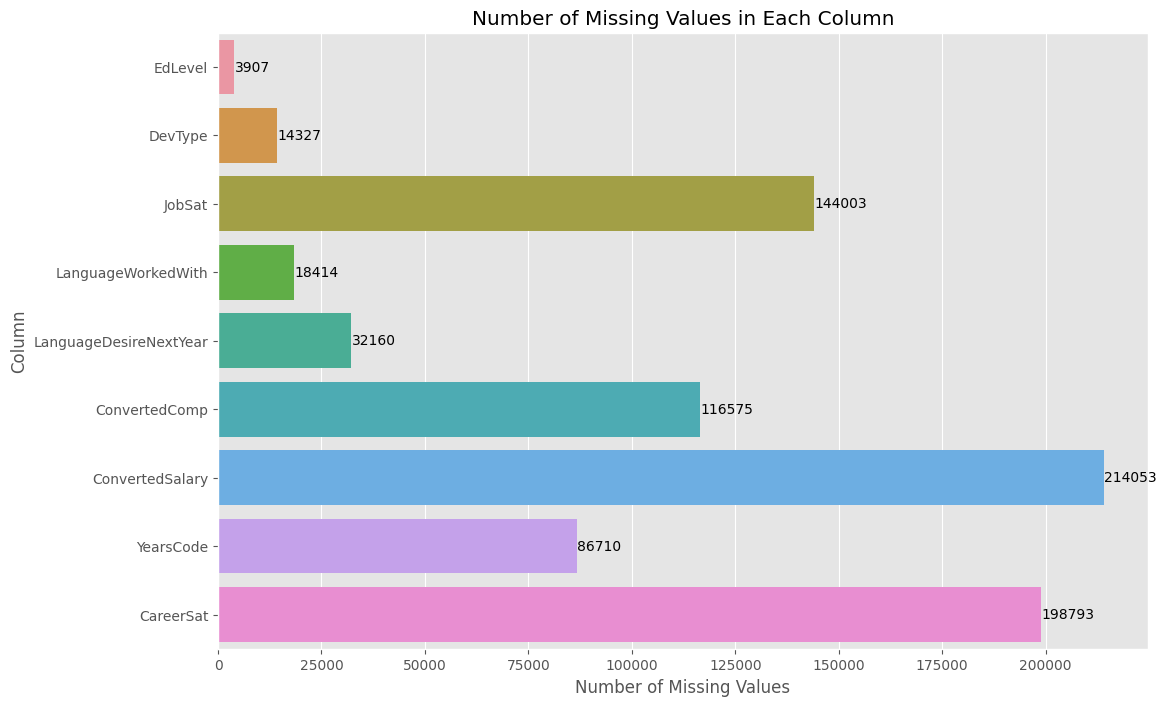

In [23]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Create a DataFrame from the missing values series for easier plotting
missing_values_df = pd.DataFrame(missing_values, columns=['missing_values'])
missing_values_df.reset_index(inplace=True)
missing_values_df.rename(columns={'index': 'column_name'}, inplace=True)

# Only keep the columns with missing values for the plot
missing_values_df = missing_values_df[missing_values_df['missing_values'] > 0]

# Create a bar plot to visualize the missing values
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=missing_values_df, y='column_name', x='missing_values', orient='h')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column')
plt.title('Number of Missing Values in Each Column')

# Add the number of missing values at the end of each bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 100,  # add a small offset to make sure the text doesn't overlap with the bar
             p.get_y() + p.get_height() / 2,
             '{}'.format(int(width)),
             va='center')
plt.show()

In [24]:
# Fill missing numeric values with the median
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].median(), inplace=True)

df.head()

,Respondent,Country,Employment,EdLevel,DevType,JobSat,LanguageWorkedWith,LanguageDesireNextYear,ConvertedComp,Year,ConvertedSalary,YearsCode,CareerSat,RemoteWork
0,2,United Kingdom,Employed part-time,Some college/university study without earning ...,NaN,NaN,"[JavaScript, Python, Ruby, SQL]","[Java, Python, Ruby, SQL]",63986.0,2017,69452.0,NaN,NaN,No information
1,3,United Kingdom,Employed full-time,Bachelor's degree,Other,8.0,"[Java, PHP, Python]","[C, Python, Rust]",113750.0,2017,69452.0,NaN,NaN,No information
2,4,United States,Employed full-time,Doctoral degree,NaN,6.0,"[Matlab, Python, R, SQL]","[Matlab, Python, R, SQL]",63986.0,2017,69452.0,NaN,NaN,No information
3,5,Switzerland,Employed full-time,Master's degree,Mobile developer; Graphics programming; Deskto...,6.0,NaN,NaN,63986.0,2017,69452.0,NaN,NaN,No information
4,7,United States,Employed full-time,Master's degree,NaN,7.0,"[Matlab, Python]","[JavaScript, Julia, Matlab, Python, R, SQL]",63986.0,2017,69452.0,NaN,NaN,No information


In [25]:
# Create a dictionary to map countries to continents
continent_dict = {
    'United States': 'North America',
    'United Kingdom': 'Europe',
    'Switzerland': 'Europe',
    'Poland': 'Europe',
    'Colombia': 'South America',
    'France': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Brazil': 'South America',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Chile': 'South America',
    'Argentina': 'South America',
    'Netherlands': 'Europe',
    'Denmark': 'Europe',
    'Finland': 'Europe',
    'Spain': 'Europe',
    'Austria': 'Europe',
    'Uruguay': 'South America',
    'Sweden': 'Europe',
    'Paraguay': 'South America',
    'Romania': 'Europe',
    'Norway': 'Europe',
    'Portugal': 'Europe',
    'Czech Republic': 'Europe',
    'Ireland': 'Europe',
    'Hungary': 'Europe',
    'Bolivia': 'South America',
    'Ecuador': 'South America',
    'Peru': 'South America',
    'Venezuela': 'South America'
}

# Create a new column 'Continent' by mapping the 'Country' column to the continent dictionary
df['Continent'] = df['Country'].map(continent_dict)

# Drop the columns with more than 60% missing values
df = df.drop(['CareerSat'], axis=1)

In [26]:
# Fill NaN values in the YearsCode column with the most common value
most_common_value = df['YearsCode'].mode()[0]
df['YearsCode'] = df['YearsCode'].fillna(most_common_value)

# Since 'JobSat' is a categorical variable, we will fill the missing values with the mode (most frequent value)
most_common_value = df['JobSat'].mode()[0]
df['JobSat'].fillna(most_common_value, inplace=True)

# Fill NaN values in the EdLevel column with the most common value
most_common_value = df['EdLevel'].mode()[0]
df['EdLevel'] = df['EdLevel'].fillna(most_common_value)

# Fill NaN values in the DevType column with the most common value
most_common_value = df['DevType'].mode()[0]
df['DevType'] = df['DevType'].fillna(most_common_value)

In [27]:
# Fill missing values with a string representation of an empty list
df['LanguageWorkedWith'].fillna(value='[]', inplace=True)
df['LanguageDesireNextYear'].fillna(value='[]', inplace=True)

# Convert string representation of lists to actual lists
df['LanguageWorkedWith'] = df['LanguageWorkedWith'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['LanguageDesireNextYear'] = df['LanguageDesireNextYear'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [28]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


In [29]:
# 2. Check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Respondent                   int64
Country                   category
Employment                category
EdLevel                   category
DevType                     object
JobSat                    category
LanguageWorkedWith          object
LanguageDesireNextYear      object
ConvertedComp              float64
Year                         int64
ConvertedSalary            float64
YearsCode                   object
RemoteWork                category
Continent                   object
dtype: object


In [30]:
# Calculate the percentage of missing values in each column
missing_values_percent = df.isnull().mean() * 100

# Create a DataFrame from the series
missing_values_percent_df = pd.DataFrame(missing_values_percent, columns=['missing_values_percent'])

# Add the data type of each column to the DataFrame
missing_values_percent_df['dtype'] = df.dtypes

# Display the DataFrame
missing_values_percent_df

,missing_values_percent,dtype
Respondent,0.0,int64
Country,0.0,category
Employment,0.0,category
EdLevel,0.0,category
DevType,0.0,object
JobSat,0.0,category
LanguageWorkedWith,0.0,object
LanguageDesireNextYear,0.0,object
ConvertedComp,0.0,float64
Year,0.0,int64


## 4 - Data Modeling

Answer the Business Questions:

#### Business Question 1:

What are the most popular languages among developers in each year?

In [31]:
# List of unique years
years = df['Year'].unique()

# Initialize an empty dictionary to store the results
popular_languages = {}

# Loop over each year
for year in years:
    # Filter the dataframe for the given year
    df_year = df[df['Year'] == year]
    
    # Concatenate all the lists in the 'LanguageWorkedWith' column and count the occurrences of each language
    language_counts = pd.Series(np.concatenate(df_year['LanguageWorkedWith'].values)).value_counts()
    
    # Store the results in the dictionary
    popular_languages[year] = language_counts

# Convert the dictionary to a DataFrame for easier analysis
popular_languages_df = pd.DataFrame(popular_languages)

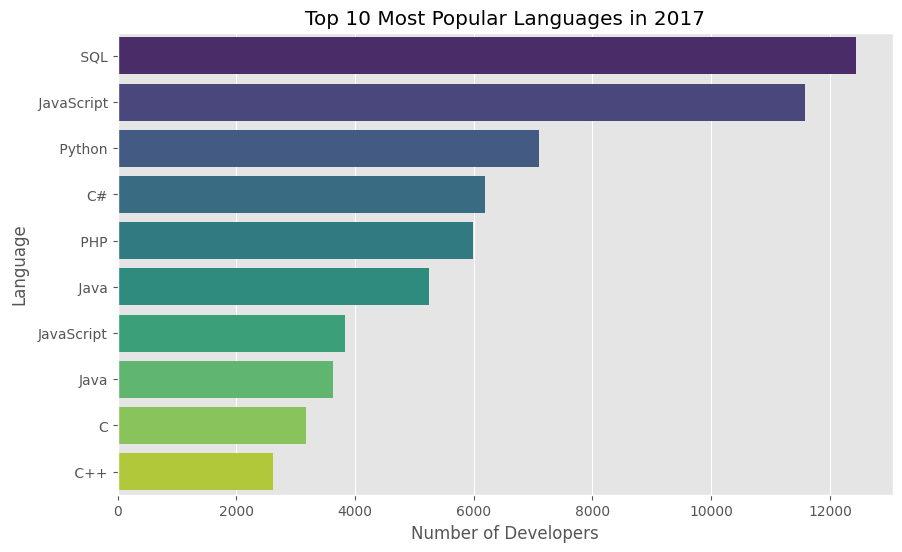

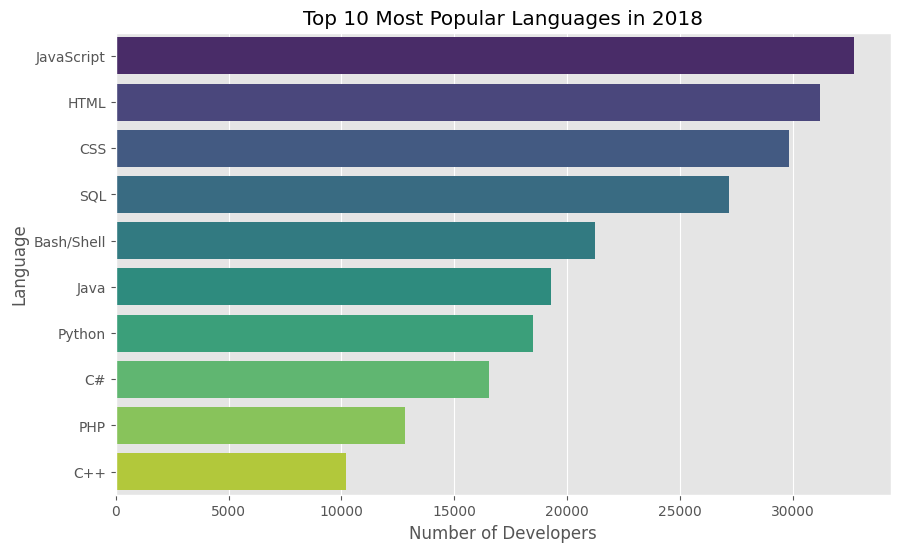

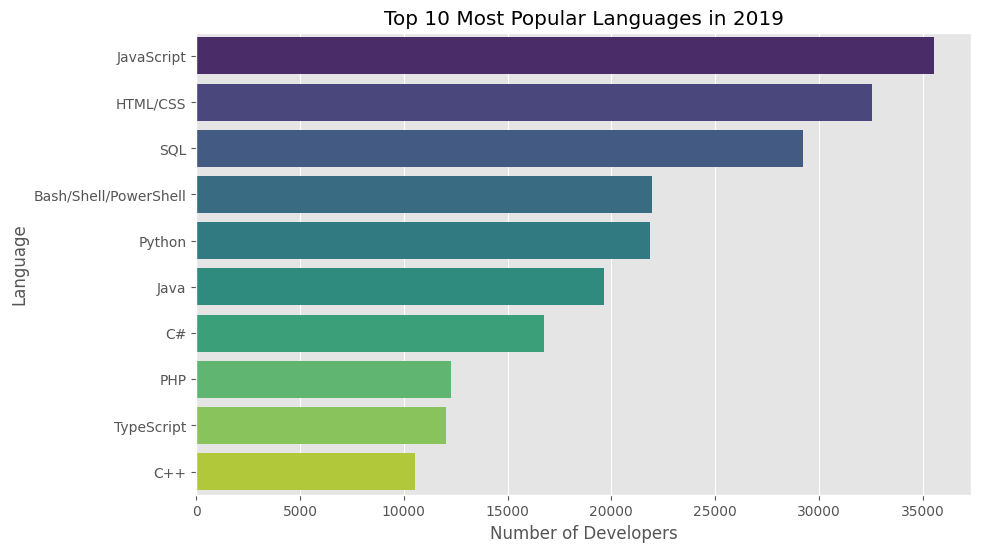

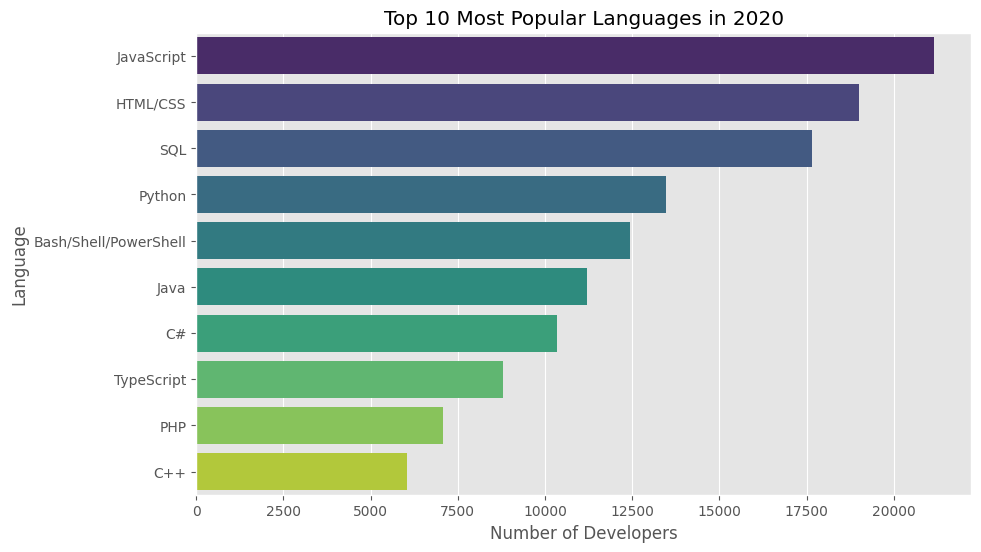

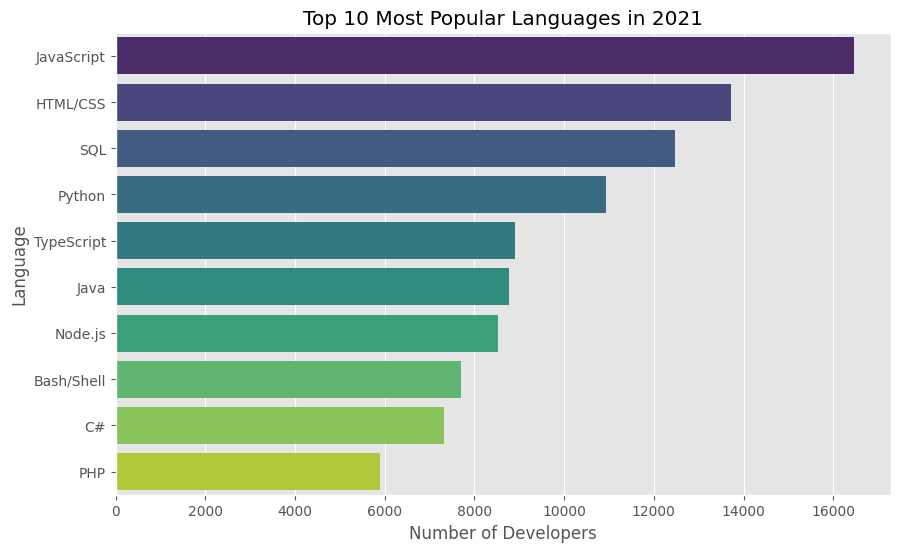

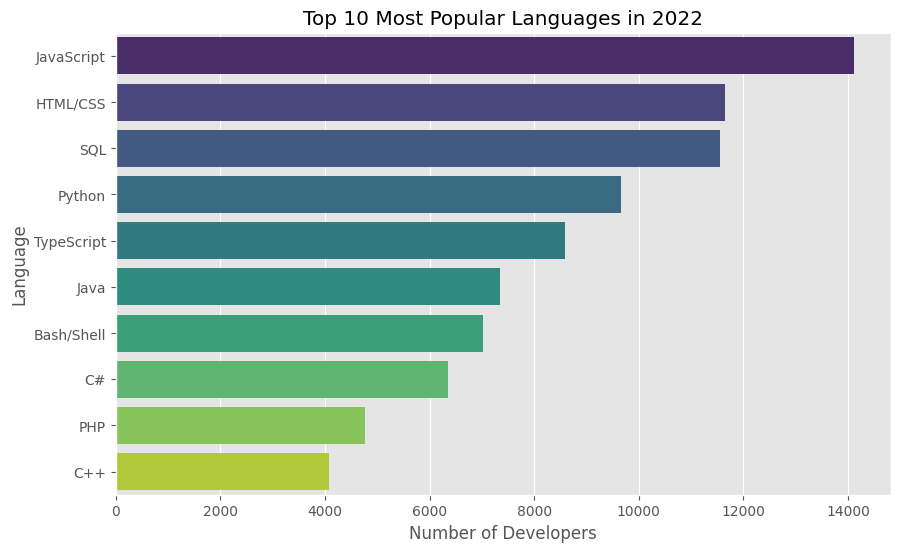

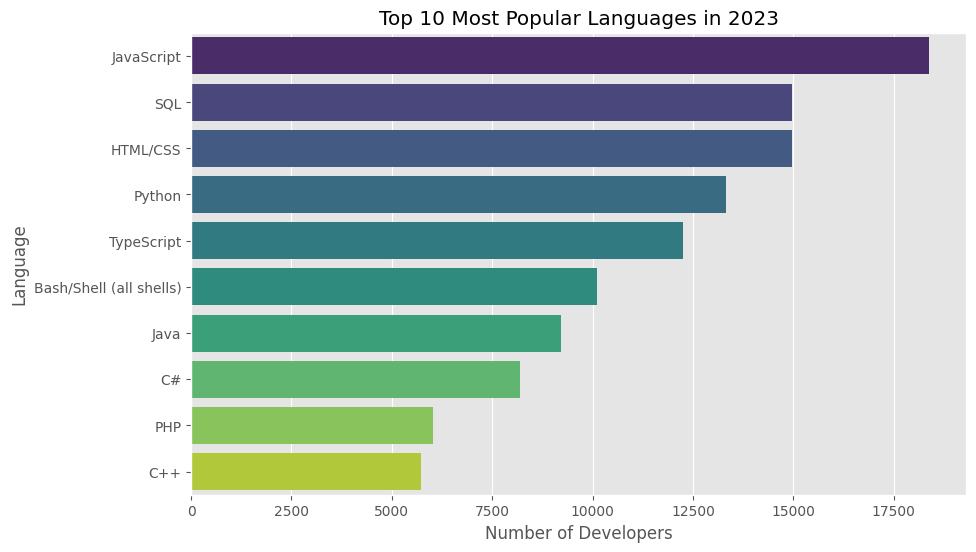

In [32]:
# Define a function to plot the most popular languages for a given year
def plot_popular_languages(year, num_languages=10):
    # Get the language counts for the given year
    language_counts = popular_languages[year]
    
    # Sort the languages by count and keep the top 'num_languages' languages
    top_languages = language_counts.sort_values(ascending=False)[:num_languages]
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_languages.values, y=top_languages.index, palette='viridis')
    plt.title(f"Top {num_languages} Most Popular Languages in {year}")
    plt.xlabel("Number of Developers")
    plt.ylabel("Language")
    plt.show()

# Plot the most popular languages for each year
for year in years:
    plot_popular_languages(year)

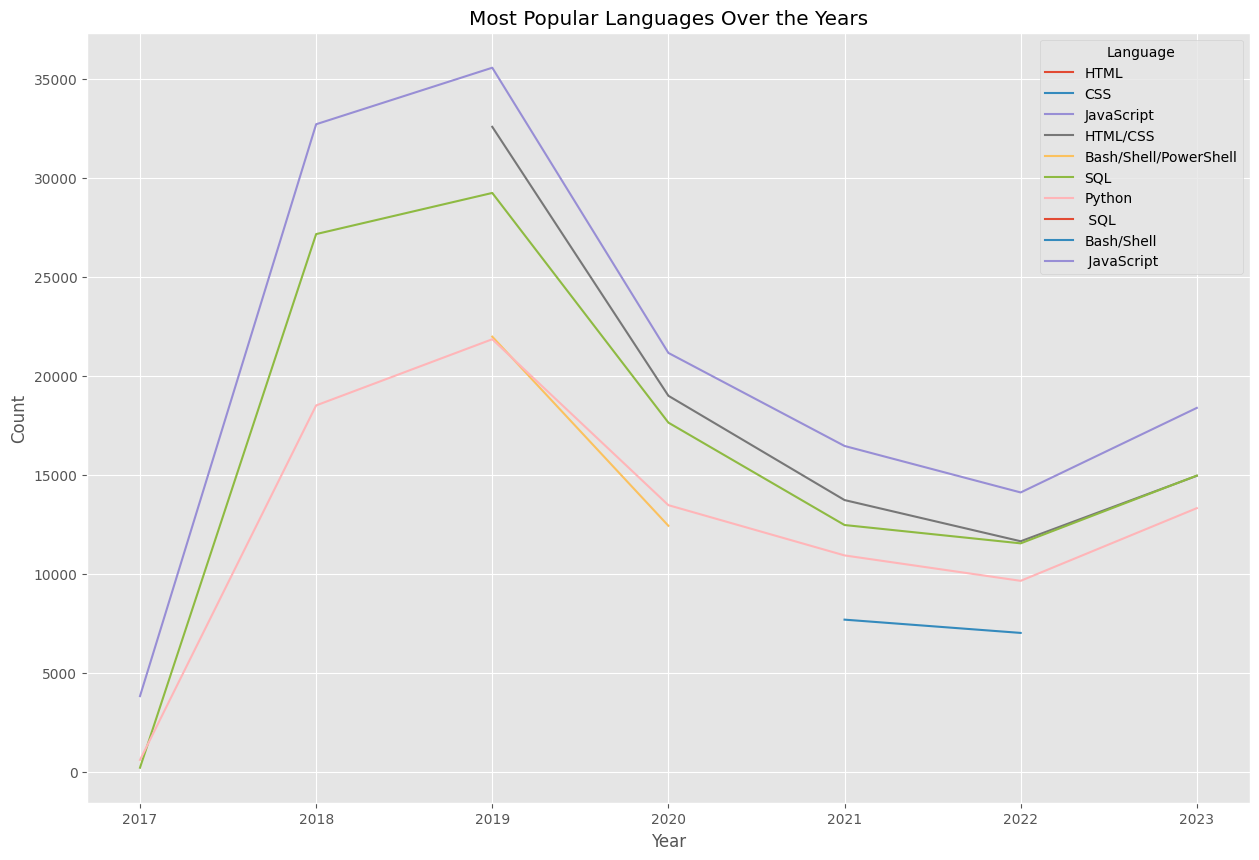

In [33]:
# Initialize an empty DataFrame to store the popularity of languages for each year
popular_languages = pd.DataFrame()

# For each year...
for year in df['Year'].unique():
    # Filter the data for the current year
    df_year = df[df['Year'] == year]
    
    # Flatten the list of languages and count the occurrence of each language
    language_counts = pd.Series([lang for sublist in df_year['LanguageWorkedWith'].dropna() for lang in sublist]).value_counts()
    
    # Store the language counts in the DataFrame
    popular_languages = pd.concat([popular_languages, language_counts], axis=1)

# Rename the columns of the DataFrame
popular_languages.columns = df['Year'].unique()

# Calculate the average popularity of each language over the years
popular_languages['Average'] = popular_languages.mean(axis=1)

# Sort the languages by their average popularity
popular_languages.sort_values(by='Average', ascending=False, inplace=True)

# Take the top 10 most popular languages
top_languages = popular_languages.head(10)

# Create a new DataFrame without the 'Average' column for the plot
top_languages_plot = top_languages.drop(columns='Average')

# Plot the popularity of the top languages over the years
top_languages_plot.transpose().plot(kind='line', figsize=(15, 10))

plt.title('Most Popular Languages Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Language')
plt.show()

### Business Question 2:

What are the most popular languages among data scientists?

/tmp/ipykernel_299300/2029339266.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_languages_ds.drop(columns='Average', inplace=True)


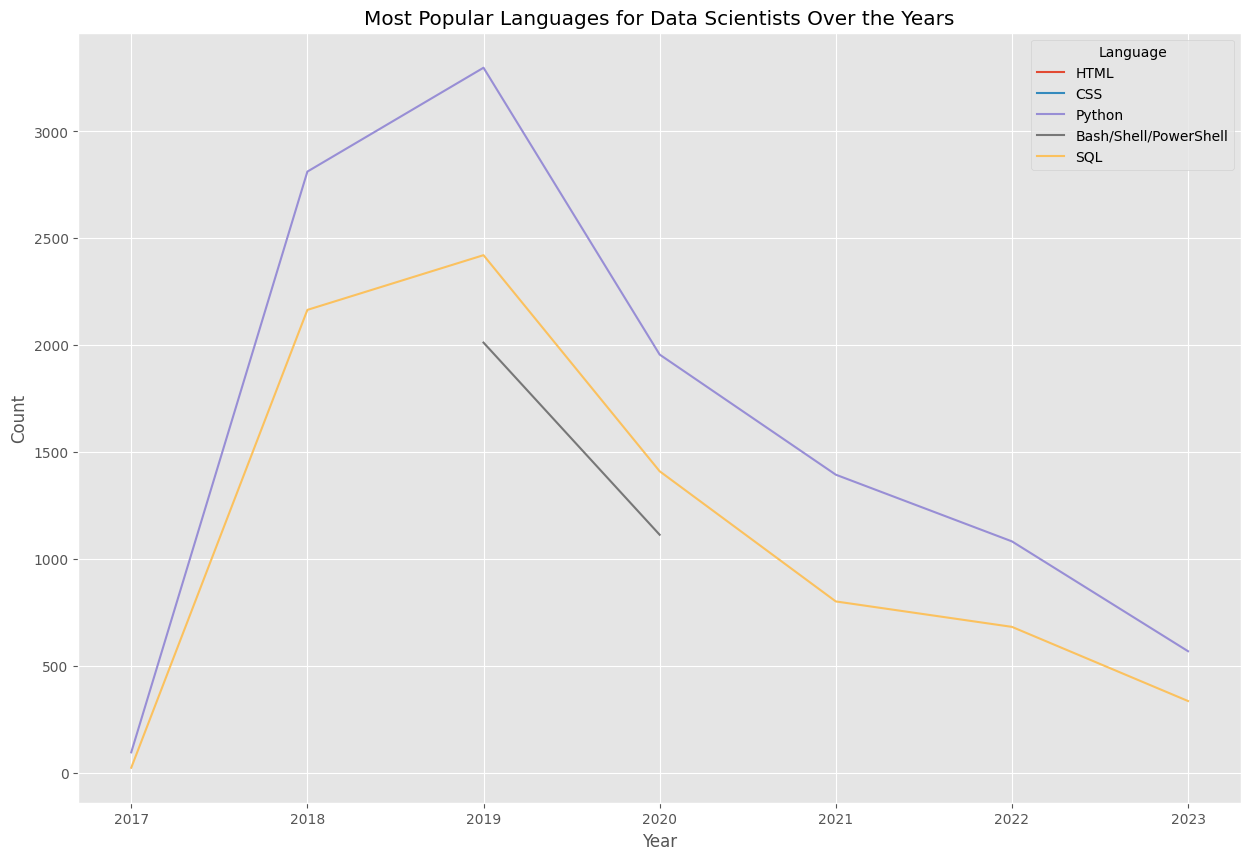

In [34]:
# Filter the dataframe for respondents who identified as data scientists or machine learning specialists
df_data_scientists = df[df['DevType'].apply(lambda x: 'Data scientist' in x or 'Machine learning specialist' in x if x else False)]

# Initialize an empty DataFrame to store the popularity of languages for each year
popular_languages_ds = pd.DataFrame()

# For each year...
for year in df_data_scientists['Year'].unique():
    # Filter the data for the current year
    df_year = df_data_scientists[df_data_scientists['Year'] == year]
    
    # Flatten the list of languages and count the occurrence of each language
    language_counts = pd.Series([lang for sublist in df_year['LanguageWorkedWith'].dropna() for lang in sublist]).value_counts()
    
    # Store the language counts in the DataFrame
    popular_languages_ds = pd.concat([popular_languages_ds, language_counts], axis=1)

# Rename the columns of the DataFrame
popular_languages_ds.columns = df_data_scientists['Year'].unique()

# Calculate the average popularity of each language over the years
popular_languages_ds['Average'] = popular_languages_ds.mean(axis=1)

# Sort the languages by their average popularity
popular_languages_ds.sort_values(by='Average', ascending=False, inplace=True)

# Take the top 5 most popular languages
top_languages_ds = popular_languages_ds.head(5)

# Drop the 'Average' column for the plot
top_languages_ds.drop(columns='Average', inplace=True)

# Plot the popularity of the top languages over the years
top_languages_ds.transpose().plot(kind='line', figsize=(15, 10))

plt.title('Most Popular Languages for Data Scientists Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Language')
plt.show()

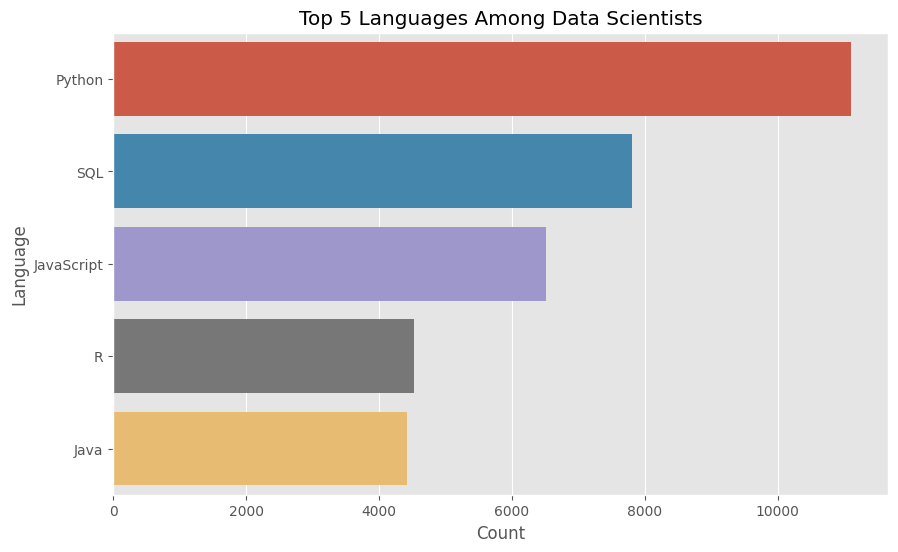

In [35]:
# First, we need to identify the rows where the 'DevType' column contains 'Data scientist or machine learning specialist'
data_scientists = df[df['DevType'].str.contains('Data scientist or machine learning specialist', na=False)]

# Now we flatten the list of languages and count the occurrence of each language
language_counts = pd.Series([lang for sublist in data_scientists['LanguageWorkedWith'].dropna() for lang in sublist]).value_counts()

# We'll look at the top 10 most popular languages among data scientists
top_languages = language_counts.head(5)

# Now let's create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_languages.index, x=top_languages.values, orient='h')
plt.xlabel('Count')
plt.ylabel('Language')
plt.title('Top 5 Languages Among Data Scientists')
plt.show()

### Business Question 3:

What is the trend in remote work among developers?
With the rise of remote work, especially due to the COVID-19 pandemic, this question aims to understand the trend of remote work among developers.

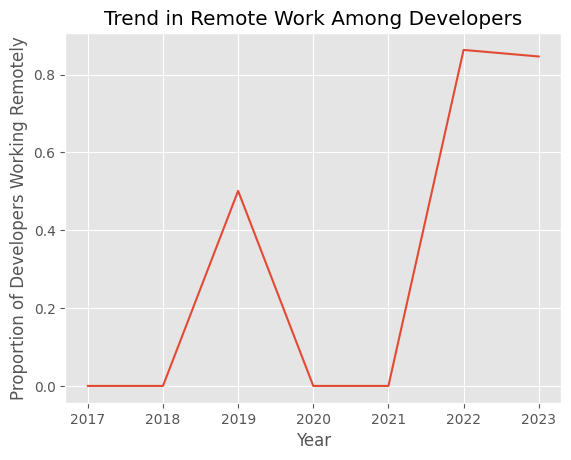

In [36]:
# Define the categories that are considered as working remotely
remote_categories = [
    'A few days each month',
    "All or almost all the time (I'm full-time remote)",
    'Less than half the time, but at least one day each week',
    'About half the time',
    'More than half, but not all, the time',
    'Fully remote',
    'Hybrid (some remote, some in-person)',
    'Remote'
]

# Create a new binary column that indicates whether a respondent works remotely
df['WorksRemotely'] = df['RemoteWork'].isin(remote_categories)

# Calculate the proportion of remote workers for each year
remote_work_trend = df.groupby('Year')['WorksRemotely'].mean()

# Plot the trend
remote_work_trend.plot(kind='line', title='Trend in Remote Work Among Developers')
plt.ylabel('Proportion of Developers Working Remotely')
plt.show()

## Evaluation

From the Business questions the following insights can be raised.

1 - JavaScript, SQL and Python are the most important languages. SQL and Python is larged used in Data field.
This information can be useful for those want to decide which languages they should learn or for those want o start on the data field as Data Analysts or Data Scientist.

2 - Python and SQL are the most important languages for data scientist/machine learning specialists. This is not surprising given Python's extensive ecosystem of data science libraries such as NumPy, Pandas and Scikit-Learn. SQL also make sense as second most important given that scientist often need to interact with databases to retrieve and manipulate data. 
R is another language widely used in the data science community, primarily for statiscal analysis and visualization. These three languages popularity remained relatively stable over the years.

3 - The remote work is increase since 2021, indicating an increasing proportion of developers are working remotely over time.
This could be due to a variety of reasons such as advancements in technology, changes in work culture, and global events like the COVID-19 pandemic. The steep increase in remote work starting from 2020 likely reflects the impact of the COVID-19 pandemic, which forced many companies to switch to remote work.

This analysis provides valuable insights for companies, policymakers, and workers in the tech industry. For companies, understanding this trend can help them adapt their policies and practices to attract and retain talent. For policymakers, it can inform decisions related to labor laws, taxes, and infrastructure. For workers, it sheds light on the evolving nature of work in their industry. 